## Convolutional Neural Networks
**by: Santiago Hincapie**

## Outline
1. The Architecture of the Visual Cortex
2. Introduction
3. Layers
    + Convolutional Layer
    + Pooling Layer
    + Fully-Connected Layer
4. Architectures

## Image recognition
Although IBM’s Deep Blue supercomputer beat the chess world champion Garry Kasparov
back in 1996, until quite recently computers were unable to reliably perform
seemingly trivial tasks such as detecting a puppy in a picture or recognizing spoken
words.

**Why are these tasks so effortless to us humans?**

## [The Architecture of the Visual Cortex](https://youtu.be/8VdFf3egwfg?t=1m10s)
David H. Hubel and Torsten Wiesel performed a series of experiments on cats in
1958 and 1959 giving crucial insights on the structure of the visual cortex 
(the authors received the Nobel Prize in Physiology or Medicine in 1981 for their work). 

In particular, they showed that many neurons in the visual cortex have a small
local receptive field, meaning they react only to visual stimuli located in a
limited region of the visual field

# Convolutional Network 
**Without brain stuff**

## Fully connected
![](img/d20.png)

## Convolutional filter
![](img/d21.png)

## Convolutional filter
![](img/d23.png)

## Activation map
![](img/d22.png)

## Convolutional layer
![](img/d24.png)

## Convolutional network
![](img/d25.png)

In [20]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [21]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [23]:
img_rows = 28
img_cols = 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [24]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

batch_size = 128
num_classes = 10
epochs = 12
num_classes = 10

model = Sequential()

model.add(tf.keras.layers.Conv2D(filters=6,
                                 kernel_size=5,
                                 strides=(1, 1),
                                 activation='relu',
                                 padding='valid',
                                 input_shape=input_shape))

model.add(tf.keras.layers.Conv2D(10,
                                 kernel_size=5,
                                 activation='relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [26]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 20, 10)        1510      
_________________________________________________________________
flatten_3 (Flatten)          (None, 4000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               512128    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 515,084
Trainable params: 515,084
Non-trainable params: 0
_________________________________________________________________


In [29]:
from time import time

tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./logs/{}_{}'.format('mnist', time()))

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0801 - acc: 0.9766 - val_loss: 0.0404 - val_acc: 0.9873
Epoch 2/12
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0641 - acc: 0.9804 - val_loss: 0.0361 - val_acc: 0.9882
Epoch 3/12
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0548 - acc: 0.9835 - val_loss: 0.0316 - val_acc: 0.9897
Epoch 4/12
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0466 - acc: 0.9857 - val_loss: 0.0325 - val_acc: 0.9890
Epoch 5/12
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0395 - acc: 0.9874 - val_loss: 0.0309 - val_acc: 0.9902
Epoch 6/12
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0349 - acc: 0.9886 - val_loss: 0.0320 - val_acc: 0.9895
Epoch 7/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0327 - acc: 0.9891 - val_loss: 0.0304 - val_acc

In [30]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03144394681821877
Test accuracy: 0.9909


In [32]:
from tensorflow.keras.models import load_model

model.save('models/mnist_cnn.h5')
# model = load_model('models/mnist_cnn.h5')

(5, 5, 1, 6)


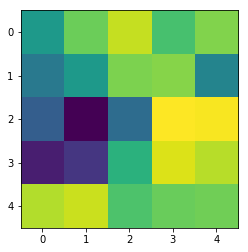

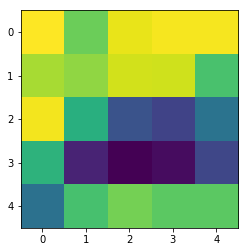

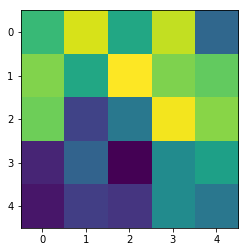

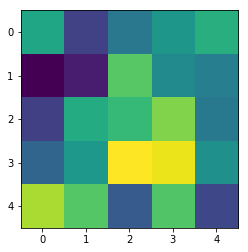

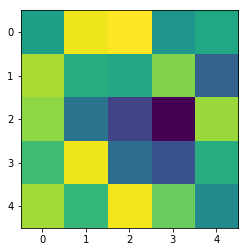

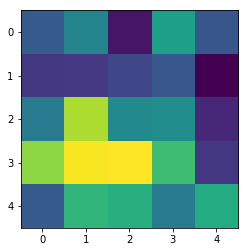

In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

w0 = model.get_weights()[0]
print(w0.shape)
w0 = np.squeeze(np.rollaxis(w0, -1, -2))

for i in range(w0.shape[-1]):
    plt.imshow(w0[:,:,i])
    plt.show()
#mlutils.display_imgs(w0)

## Pooling
![](img/d26.png)

## Max Pooling
![](img/d27.png)

## Max Pooling
![](img/d28.png)

```python
MaxPooling2D(pool_size=(2, 2), strides=None)
```

## Fully-Connected Layer
![](img/convnet.jpeg)

# ConvNet Architectures

## Layer Patterns
**`INPUT -> [[CONV -> RELU]*N -> POOL?]*M -> [FC -> RELU]*K -> FC`**

## Outsite image processing
[VariantNET](https://github.com/pb-jchin/VariantNET)